# Imports

In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import seaborn as sns

# To import from this project
import sys
sys.path.insert(0, '..')

from models.dpgmm import DPGMM

# Sample generation
Generate samples from a DPGMM with random parameters.

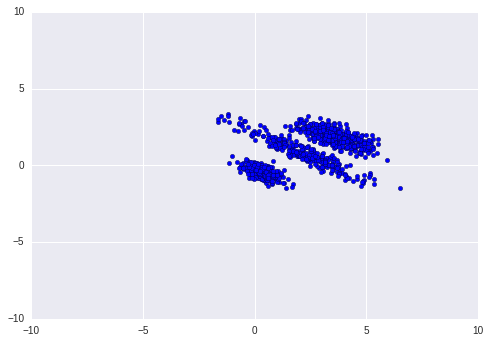

pi: [[ 0.37373219]
 [ 0.27058172]
 [ 0.3556861 ]]

mu: [[ 3.61011783  1.85133961]
 [ 2.04748237  0.82785698]
 [ 0.38003806 -0.44196601]]

cov: [[[ 0.73433885 -0.28402298]
  [-0.28402298  0.25058506]]

 [[ 2.37027785 -1.49362627]
  [-1.49362627  1.03669866]]

 [[ 0.19151562 -0.08646282]
  [-0.08646282  0.11265003]]]

assigment counts 0: 401
assigment counts 1: 264
assigment counts 2: 335


In [10]:
# Settings
N = 1000
d = 2
K = 3

# Feed
X = multivariate_normal.rvs(mean=[0., 0.], cov=np.eye(2), size = N)

# Create a random DPGMM and sample from it
dpgmm = DPGMM()
dpgmm.set_random_parameters(X, K)
X, z = dpgmm.sample(N)

# Plot samples
plt.scatter(X[:, 0], X[:, 1])
plt.axis([-10, 10, -10, 10])
plt.show()

print("pi: " + str(dpgmm.pi))
print("")
print("mu: " + str(dpgmm.mu))
print("")
print("cov: " + str(dpgmm.cov))
print("")
for i in range(dpgmm.K_active):
    print("assigment counts " + str(i) + ": " + str(np.count_nonzero(z == i)))

## Clustering
Fit a DPGMM to the generated data and evaluate the obtained clustering with a confusion matrix.

In [12]:
dpgmm.fit(X, compute_cm=True)

100%|██████████| 100/100 [03:29<00:00,  2.10s/it]


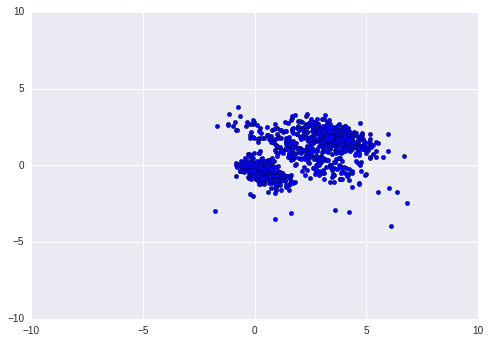

pi: [[ 0.33390187]
 [ 0.25937597]
 [ 0.40150028]
 [ 0.00522189]]

mu: [[ 0.370988   -0.45610413]
 [ 2.16897425  0.79308647]
 [ 3.57596682  1.88052282]
 [ 1.34123394 -2.26764832]]

cov: [[[ 0.23539684 -0.101421  ]
  [-0.101421    0.19354864]]

 [[ 2.13781093 -1.36826211]
  [-1.36826211  1.13729574]]

 [[ 0.76597798 -0.29198353]
  [-0.29198353  0.32243971]]

 [[ 6.50396733  0.30988491]
  [ 0.30988491  1.20509004]]]

assigment counts 0: 341
assigment counts 1: 255
assigment counts 2: 397


In [13]:
# Sample from the fitted DPGMM
X, z = dpgmm.sample(N)
    
# Plot samples to compare with the original data
plt.scatter(X[:, 0], X[:, 1])
plt.axis([-10, 10, -10, 10])
plt.show()

print("pi: " + str(dpgmm.pi))
print("")
print("mu: " + str(dpgmm.mu))
print("")
print("cov: " + str(dpgmm.cov))
print("")
for i in range(K):
    print("assigment counts " + str(i) + ": " + str(np.count_nonzero(z == i)))

In [14]:
dpgmm.cm

array([[ 50.,  50.,   1., ...,   1.,   1.,  50.],
       [ 50.,  50.,   1., ...,   1.,   1.,  50.],
       [  1.,   1.,  50., ...,   1.,  50.,   1.],
       ..., 
       [  1.,   1.,   1., ...,  50.,   1.,   1.],
       [  1.,   1.,  50., ...,   1.,  50.,   1.],
       [ 50.,  50.,   1., ...,   1.,   1.,  50.]])